In [1]:
# -*- coding: utf-8 -*-
# <nbformat>3.0</nbformat>

# <codecell>

# coding: utf-8
%matplotlib inline
import matplotlib
import numpy as np
import scipy.integrate
import matplotlib.pyplot as plt
from matplotlib import rc ## desnec?essário
matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams.update({'font.size': 22})


'''
Ressonâncias fixando L e variando alpha?
'''


#Discretização
M = 101 #espaço
N = 4000 #tempo
Tmax = 400.0

D = [1.0, 5.0, 0.0]


Text(0.5,0,u'$\\alpha$')

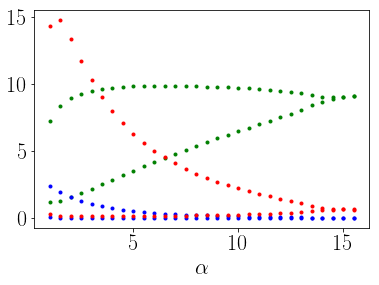

In [15]:
l = 0.5 + 35*0.0125
mu = 15
t = np.linspace(0,Tmax,N)
m = 1.0
gamma = 0.5
beta = 8
phi = 1.0
D = [[1.0,5.0,0.0]]
ALPHA = [1.0 + 0.5*j for j in range(0,30)]

RMAX = []
RMIN = []
C1MAX = []
C1MIN = []
C2MAX = []
C2MIN = []

for d in D:
    print("D = " + str(d))
    D1,D2,DR = d[0],d[1],d[2]
    d_1 = D1/(l**2) #O Numerador é o D do modelo antes de adimensionalizar!
    d_2 = D2/(l**2)
    d_r = DR/(l**2)
    for a in ALPHA:
        alpha = a
        
        sol = np.load('Method_Of_LinesIGP_l = %.3f,DR=%.3f,D1=%.3f,D2=%.3f,mu=%.3f,gamma=%.3f,beta =%.3f,alpha=%3f.npy'
                % (l,DR,D1,D2,mu,gamma,beta,alpha))
        R = np.transpose(sol[:,0:M])
        C1 = np.transpose(sol[:,M:2*M])
        C2 = np.transpose(sol[:,2*M:])
        RMAX.append(np.max(R[M/2,-500:]))
        RMIN.append(np.min(R[M/2,-500:]))
        C1MAX.append(np.max(C1[M/2,-500:]))
        C1MIN.append(np.min(C1[M/2,-500:]))
        C2MAX.append(np.max(C2[M/2,-500:]))
        C2MIN.append(np.min(C2[M/2,-500:]))

plt.plot(ALPHA,RMAX,color = 'green',marker = '.',linestyle = "None")
plt.plot(ALPHA,RMIN,color = 'green',marker = '.',linestyle = "None")
plt.plot(ALPHA,C1MAX,color = 'blue',marker = '.',linestyle = "None")
plt.plot(ALPHA,C1MIN,color = 'blue',marker = '.',linestyle = "None")
plt.plot(ALPHA,C2MAX,color = 'red',marker = '.',linestyle = "None")
plt.plot(ALPHA,C2MIN,color = 'red',marker = '.',linestyle = "None")
plt.xlabel(r'$\alpha$')